## Student Name: **Devarsh Sandip Shah** 
# Student ID: **8917026**
### Practical Lab-3
---

# **<span style="color:#ff4747">1. Frame the problem and look at the big picture.</span>**


*Problem Framing:*

We're diving into data analysis to understand how BMI relates to diabetes progression using the diabetes dataset. Our goal is to predict disease progression based on BMI.

*Big Picture:*

This analysis can be a game-changer for healthcare. Knowing how obesity (indicated by high BMI) affects diabetes progression helps doctors and policymakers. We're using univariate linear regression to study this relationship by examining model parameters and performance. But remember, life's complex, and genetics and lifestyle also matter. We might need more variables and advanced modeling to get the full picture. Ultimately, our mission is to use data to improve diabetes care.

# **<span style="color:orange">2. Get the Data</span>**
This Data is downloaded from sci-kit learn library. 

In [117]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score

from sklearn import datasets

In [118]:
#Load the diabetes data from sci-kit library
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
print("Data of diabetes_x:\n",diabetes_x)
print("Shape of diabetes_x:\n",diabetes_x.shape)

Data of diabetes_x:
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Shape of diabetes_x:
 (442, 10)



# **<span style="color:#2c62f5">3. Explore the Data to gain insights.</span>**
Dataset contain 442 diabetes patient, where each patient is described by **age, sex, body mass index, average blood pressure, and six blood serum measurements along with a quantitative measure of disease progression one year after baseline.**

Now, let's convert the raw data to Pandas DataFrame:

In [119]:
diabetes_data=pd.DataFrame(diabetes_x,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
diabetes_data['dis_prog']=pd.DataFrame(diabetes_y)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [120]:
#Explore the numeric data stats
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


- Visually explore correlation between features using HeatMap.


<Axes: >

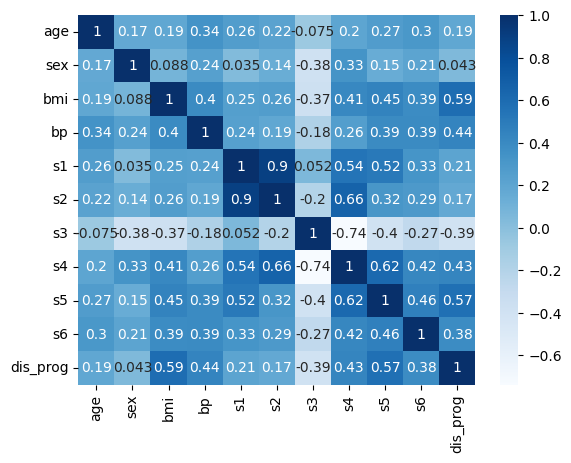

In [121]:
sns.heatmap(diabetes_data.corr(), annot=True,cmap='Blues')

- Above Heatmap shows there is a better correlationship between **bmi & dis_prog**.
- Now, we can see much detailed correlational visual of these two variables using **Scatter Plot**.  

<Axes: xlabel='bmi', ylabel='dis_prog'>

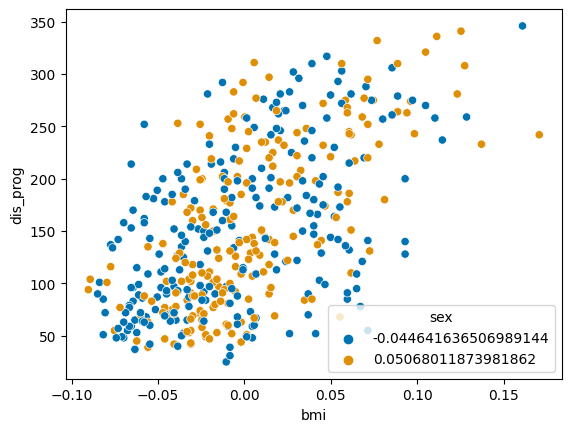

In [122]:
sns.scatterplot(data = diabetes_data, x = "bmi", y = "dis_prog", hue = "sex", palette= "colorblind")

- To gain more information about distribution of both variable we can plot histogram and scatter plot together.

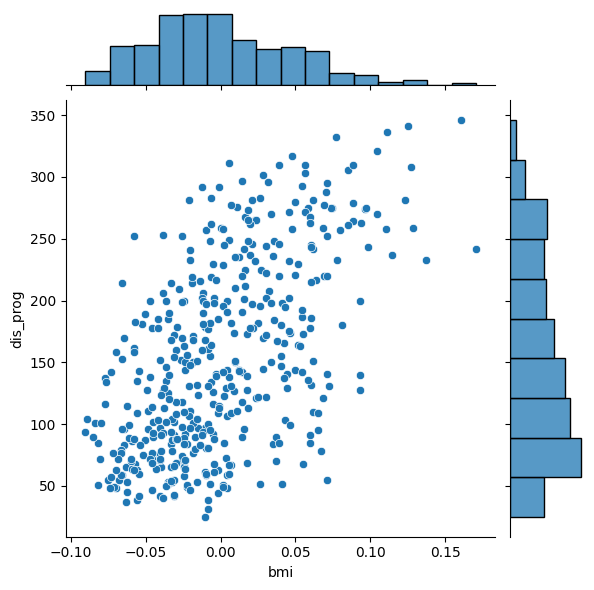

In [123]:
sns.jointplot(data=diabetes_data, x="bmi", y="dis_prog")

# **<span style="color:orange">6. Fine-tune your models and combine them into a great solution.</span>**
- Splitting the data into training and testing data 

In [124]:
x=np.array(diabetes_data["bmi"]).reshape(-1,1)
y=np.array(diabetes_data["dis_prog"])
X_train, X_test, Y_train, Y_test =train_test_split(x,y,test_size=0.2,random_state=1)

- Plotting training and testing data:
    - To see random splitted data 

Text(0.5, 1.0, 'Testing Data')

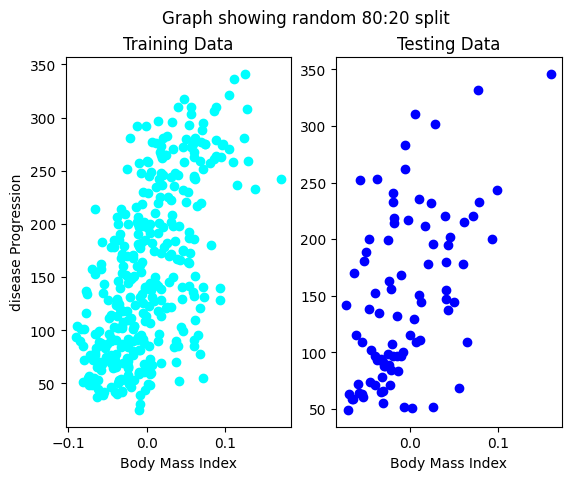

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Graph showing random 80:20 split")
ax1.scatter(X_train,Y_train,color = 'cyan')
ax1.set(xlabel='Body Mass Index',ylabel="disease Progression")
ax1.set_title("Training Data")

ax2.scatter(X_test,Y_test,color = 'blue')
ax2.set(xlabel='Body Mass Index')
ax2.set_title("Testing Data")


- Train linear regression model

In [126]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Predict the target values from testing data

In [127]:
Y_test_pred=model.predict(X_test)
Y_train_pred=model.predict(X_train)

- Finding the coefficient and Intercept of the trained model. 

In [128]:
print("Model's coefficient is: ", model.coef_)
print("Model's Intercept is: ", model.intercept_)

Model's coefficient is:  [977.74040067]
Model's Intercept is:  151.66780594915235


- Calculate the loss on training and testing datasets using mean squared error

In [129]:
train_loss = mean_squared_error(Y_train, Y_train_pred)
test_loss = mean_squared_error(Y_test, Y_test_pred)

print("Train Loss: {:.2f}".format(train_loss))
print("Test Loss: {:.2f}".format(test_loss))

# Root Mean Square Error
print("RMSE of the model is: %.2f" %np.sqrt(test_loss))

# Accuracy of the model
print("Accuracy of the model: %.2f" %model.score(x,y))


Train Loss: 3867.94
Test Loss: 3989.83
RMSE of the model is: 63.17
Accuracy of the model: 0.34


# **<span style="color:#f22e5f">7. Present your solution</span>**

- Now, lets plot the Model (a Linear line).

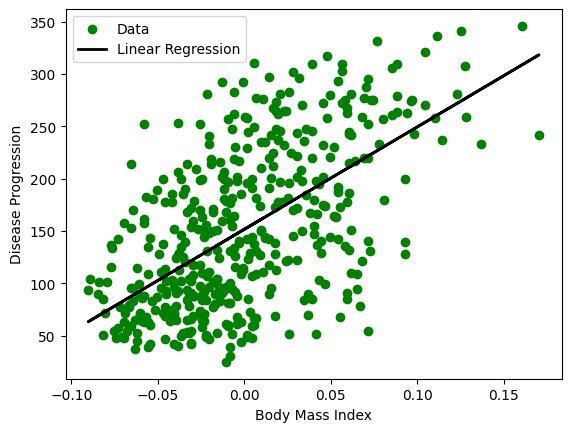

In [130]:
plt.scatter(diabetes_data["bmi"], diabetes_data["dis_prog"], color='green', label='Data')
plt.plot(X_train, Y_train_pred, color='black', linewidth=2, label='Linear Regression')
plt.xlabel('Body Mass Index')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()



There is some correlation between BMI and Disease Progression but Our model Linear Regression is not able to fit the data with more accuracy.

### My Take-aways from the model:
- The train loss of 3867.94 and test loss of 3989.83 indicate the mean squared error (MSE) of the model's predictions. The lower the MSE, the better the fit of the model to the data.
- Overall, the fit of the model seems good, but it may not be the best. The MSE values seems high, indicating that there is still room for improvement in predicting the disease progression based solely on BMI. It is recommended to further explore the dataset, consider additional independent variables, or try more advanced regression techniques to potentially improve the model's performance.